In [40]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import streamlit as st

In [41]:
""""
Content
price price in US dollars (\$326--\$18,823)

carat weight of the diamond (0.2--5.01)

cut quality of the cut (Fair, Good, Very Good, Premium, Ideal)

color diamond colour, from J (worst) to D (best)

clarity a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

x length in mm (0--10.74)

y width in mm (0--58.9)

z depth in mm (0--31.8)

depth total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)

table width of top of diamond relative to widest point (43--95)
"""

<>:1: SyntaxWarning: invalid escape sequence '\$'
<>:1: SyntaxWarning: invalid escape sequence '\$'
C:\Users\danie\AppData\Local\Temp\ipykernel_9696\1163327148.py:1: SyntaxWarning: invalid escape sequence '\$'
  """"


'"\nContent\nprice price in US dollars (\\$326--\\$18,823)\n\ncarat weight of the diamond (0.2--5.01)\n\ncut quality of the cut (Fair, Good, Very Good, Premium, Ideal)\n\ncolor diamond colour, from J (worst) to D (best)\n\nclarity a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))\n\nx length in mm (0--10.74)\n\ny width in mm (0--58.9)\n\nz depth in mm (0--31.8)\n\ndepth total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)\n\ntable width of top of diamond relative to widest point (43--95)\n'

In [42]:
df_diamonds = pd.read_csv('C:/Users/danie/Desktop/Python Project/diamonds.csv')
df_diamonds.head()

Unnamed: 0  carat      cut color clarity  depth  table  price     x     y  \
0           1   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98   
1           2   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84   
2           3   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07   
3           4   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23   
4           5   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35   

      z  
0  2.43  
1  2.31  
2  2.31  
3  2.63  
4  2.75

In [43]:
df_diamonds.tail()

Unnamed: 0  carat        cut color clarity  depth  table  price     x  \
53935       53936   0.72      Ideal     D     SI1   60.8   57.0   2757  5.75   
53936       53937   0.72       Good     D     SI1   63.1   55.0   2757  5.69   
53937       53938   0.70  Very Good     D     SI1   62.8   60.0   2757  5.66   
53938       53939   0.86    Premium     H     SI2   61.0   58.0   2757  6.15   
53939       53940   0.75      Ideal     D     SI2   62.2   55.0   2757  5.83   

          y     z  
53935  5.76  3.50  
53936  5.75  3.61  
53937  5.68  3.56  
53938  6.12  3.74  
53939  5.87  3.64

In [44]:
df_diamonds.shape

(53940, 11)

In [45]:
#First we clean the data that we intend on using
#Since the first value is called unnamed and isn't important, we can remove it
df_diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [46]:
df_diamonds = df_diamonds.drop(["Unnamed: 0"], axis=1)
df_diamonds.describe()

carat         depth         table         price             x  \
count  53940.000000  53940.000000  53940.000000  53940.000000  53940.000000   
mean       0.797940     61.749405     57.457184   3932.799722      5.731157   
std        0.474011      1.432621      2.234491   3989.439738      1.121761   
min        0.200000     43.000000     43.000000    326.000000      0.000000   
25%        0.400000     61.000000     56.000000    950.000000      4.710000   
50%        0.700000     61.800000     57.000000   2401.000000      5.700000   
75%        1.040000     62.500000     59.000000   5324.250000      6.540000   
max        5.010000     79.000000     95.000000  18823.000000     10.740000   

                  y             z  
count  53940.000000  53940.000000  
mean       5.734526      3.538734  
std        1.142135      0.705699  
min        0.000000      0.000000  
25%        4.720000      2.910000  
50%        5.710000      3.530000  
75%        6.540000      4.040000  
max       58.900000     31.800000

In [47]:
#Potential diamonds with a impossible dimensions are dropped, for example a diamond that has a 0 in x, y or z should not be possible.  
df_diamonds = df_diamonds.drop(df_diamonds[df_diamonds["x"]==0].index)
df_diamonds = df_diamonds.drop(df_diamonds[df_diamonds["y"]==0].index)
df_diamonds = df_diamonds.drop(df_diamonds[df_diamonds["z"]==0].index)
df_diamonds.shape

(53920, 10)

In [48]:
max_value = df_diamonds['price'].max()
min_value = df_diamonds['price'].min()

print(f"Maximum value in the column: {max_value}")
print(f"Minimum value in the column: {min_value}")

Maximum value in the column: 18823
Minimum value in the column: 326


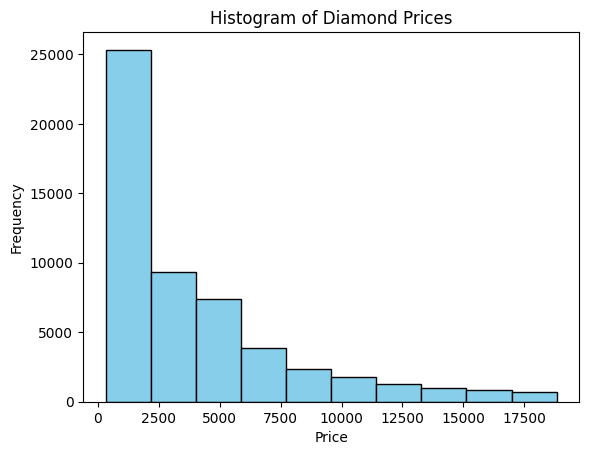

In [49]:
plt.hist(df_diamonds['price'], bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Histogram of Diamond Prices')
plt.show()

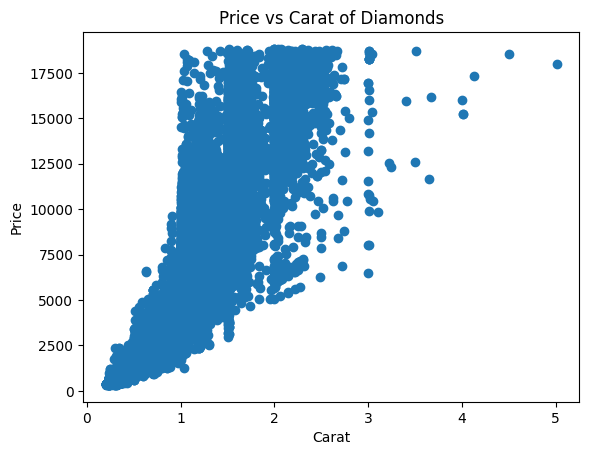

In [50]:
plt.scatter(df_diamonds['carat'], df_diamonds['price'])
plt.xlabel('Carat')
plt.ylabel('Price')
plt.title('Price vs Carat of Diamonds')
plt.show()

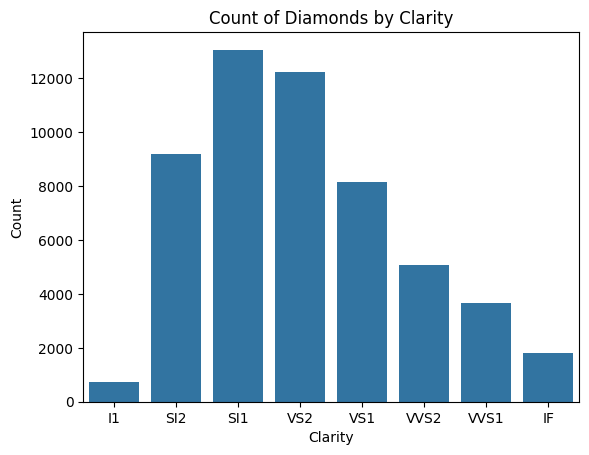

In [51]:
sns.countplot(data=df_diamonds, x='clarity', order=['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF'])
plt.xlabel('Clarity')
plt.ylabel('Count')
plt.title('Count of Diamonds by Clarity')
plt.show()

In [52]:
"""The correlation coefficient ranges from -1 to 1, where:

1 indicates a perfect positive correlation,
-1 indicates a perfect negative correlation, and
0 indicates no correlation."""

# Calculate the correlation matrix
correlation_matrix = df_diamonds[['carat', 'x', 'y', 'z']].corr()

# Extract the correlation between carat and the x, y, z values
correlation_values = correlation_matrix.loc['carat', ['x', 'y', 'z']]

print(correlation_values)

x    0.977779
y    0.953991
z    0.961048
Name: carat, dtype: float64


In [56]:
ideal_diamonds = df_diamonds[df_diamonds['cut'] == 'Ideal']

ideal_diamonds.head()

carat    cut color clarity  depth  table  price     x     y     z
0    0.23  Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
11   0.23  Ideal     J     VS1   62.8   56.0    340  3.93  3.90  2.46
13   0.31  Ideal     J     SI2   62.2   54.0    344  4.35  4.37  2.71
16   0.30  Ideal     I     SI2   62.0   54.0    348  4.31  4.34  2.68
39   0.33  Ideal     I     SI2   61.8   55.0    403  4.49  4.51  2.78

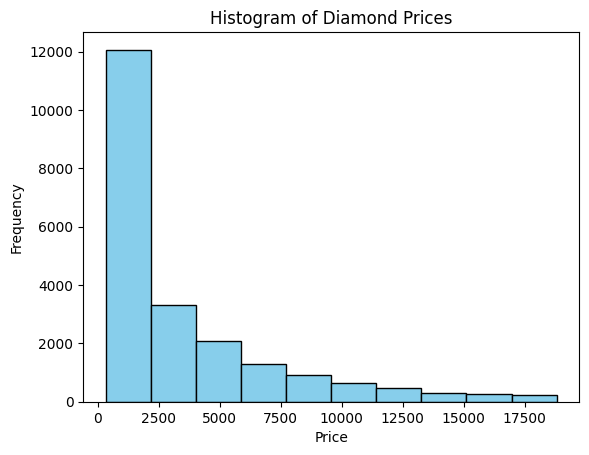

In [ ]:
plt.hist(ideal_diamonds['price'], bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Histogram of Diamond Prices')
plt.show()

In [57]:
# Set the price range for the subset
min_price = 1000
max_price = 5000

# Create a subset of diamonds within the specified price range
ideal_priced = ideal_diamonds[(ideal_diamonds['price'] >= min_price) & (ideal_diamonds['price'] <= max_price)]

# Print or visualize the subset of diamonds within the price range
ideal_priced.head()

carat    cut color clarity  depth  table  price     x     y     z
90    0.70  Ideal     E     SI1   62.5   57.0   2757  5.70  5.72  3.57
92    0.70  Ideal     G     VS2   61.6   56.0   2757  5.70  5.67  3.50
102   0.74  Ideal     G     SI1   61.6   55.0   2760  5.80  5.85  3.59
104   0.80  Ideal     I     VS1   62.9   56.0   2760  5.94  5.87  3.72
105   0.75  Ideal     G     SI1   62.2   55.0   2760  5.87  5.80  3.63

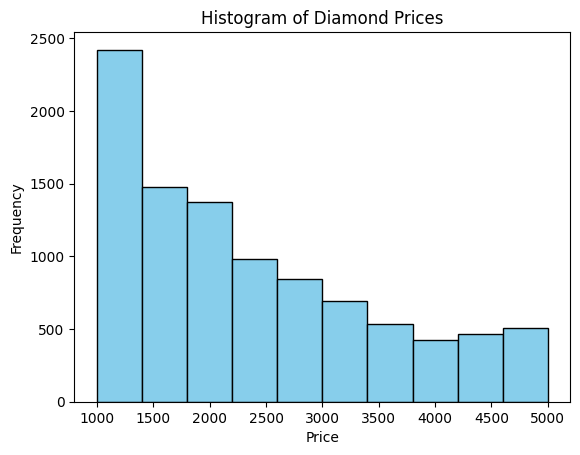

In [ ]:
plt.hist(ideal_priced['price'], bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Histogram of Diamond Prices')
plt.show()

In [ ]:
"""Define the bin edges and labels for categorizing carat values
So basically what happens here is that we define that any diamond in the carat range 0 to 1 will be placed in the category 'Tiny'. 
Similarly this happens with the other categories as well. Thus we have 'Tiny', 'Small', 'Medium', 'Large', 'Huge'.
"""
bin_edges = [0, 1, 2, 3, 4, 5.1]
bin_labels = ['Tiny', 'Small', 'Medium', 'Large', 'Huge']

# Create a new column 'carat_category' based on the categorization
df_diamonds['size'] = pd.cut(df_diamonds['carat'], bins=bin_edges, labels=bin_labels, include_lowest=True)

print(df_diamonds[['carat', 'size']])

       carat  size
0       0.23  Tiny
1       0.21  Tiny
2       0.23  Tiny
3       0.29  Tiny
4       0.31  Tiny
...      ...   ...
53935   0.72  Tiny
53936   0.72  Tiny
53937   0.70  Tiny
53938   0.86  Tiny
53939   0.75  Tiny

[53920 rows x 2 columns]


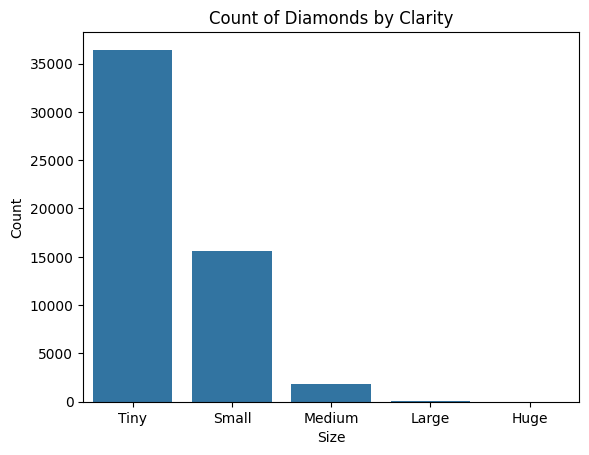

In [ ]:
#Grouped diamonds by size (Carat =)
sns.countplot(data=df_diamonds, x='size', order=['Tiny','Small', 'Medium', 'Large', 'Huge'])
plt.xlabel('Size')
plt.ylabel('Count')
plt.title('Count of Diamonds by Clarity')
plt.show()